In [1]:
import os
print(os.getcwd())

path = os.chdir('E:/3 Manuscript submission BR/figs')

print(os.getcwd())

C:\Users\Administrator
E:\3 Manuscript submission BR\figs


## Image processing

#### 1 Color-based segmentation using K-mean clustering


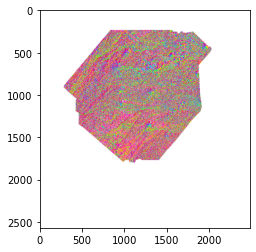

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = r'Azimuth_trini_100x100.jpg'
original_image = cv2.imread(img_path)
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

(Text(0.5, 1.0, 'Original Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

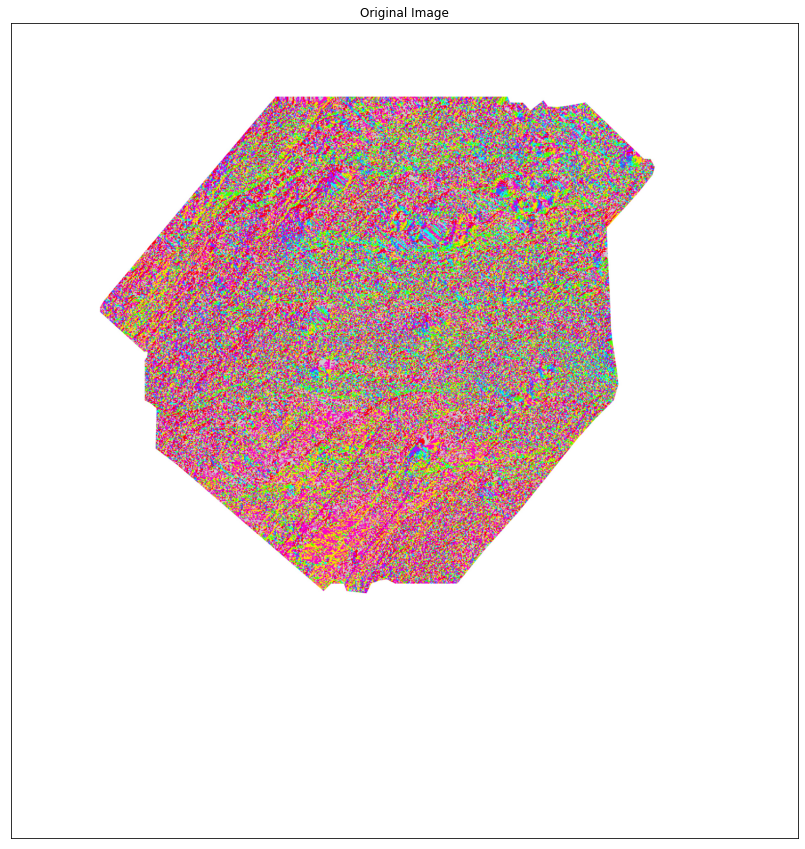

In [3]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts=50
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

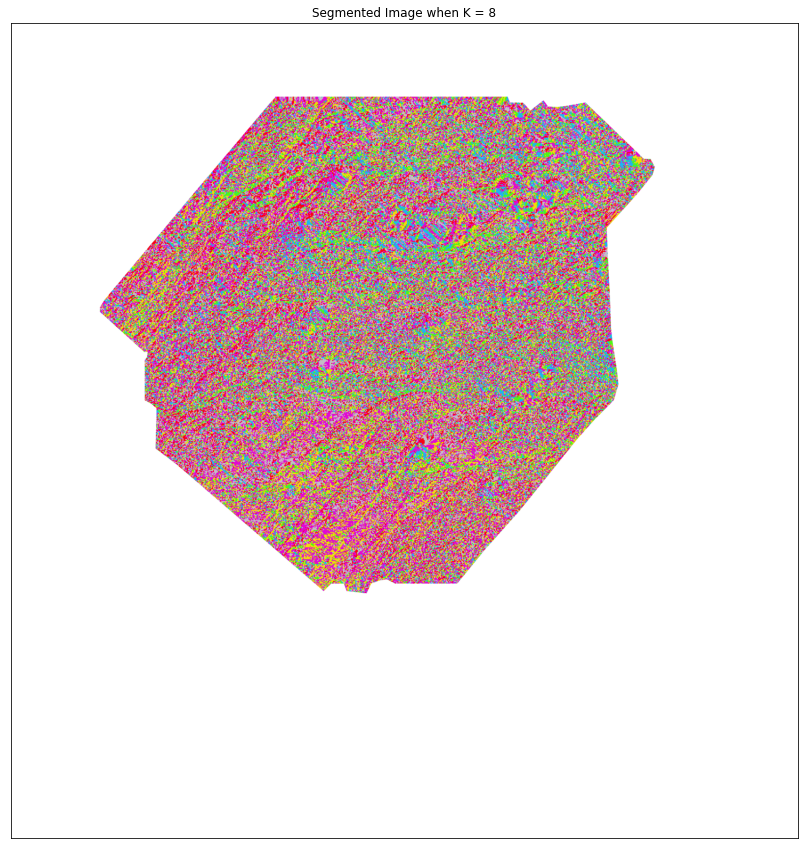

In [4]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

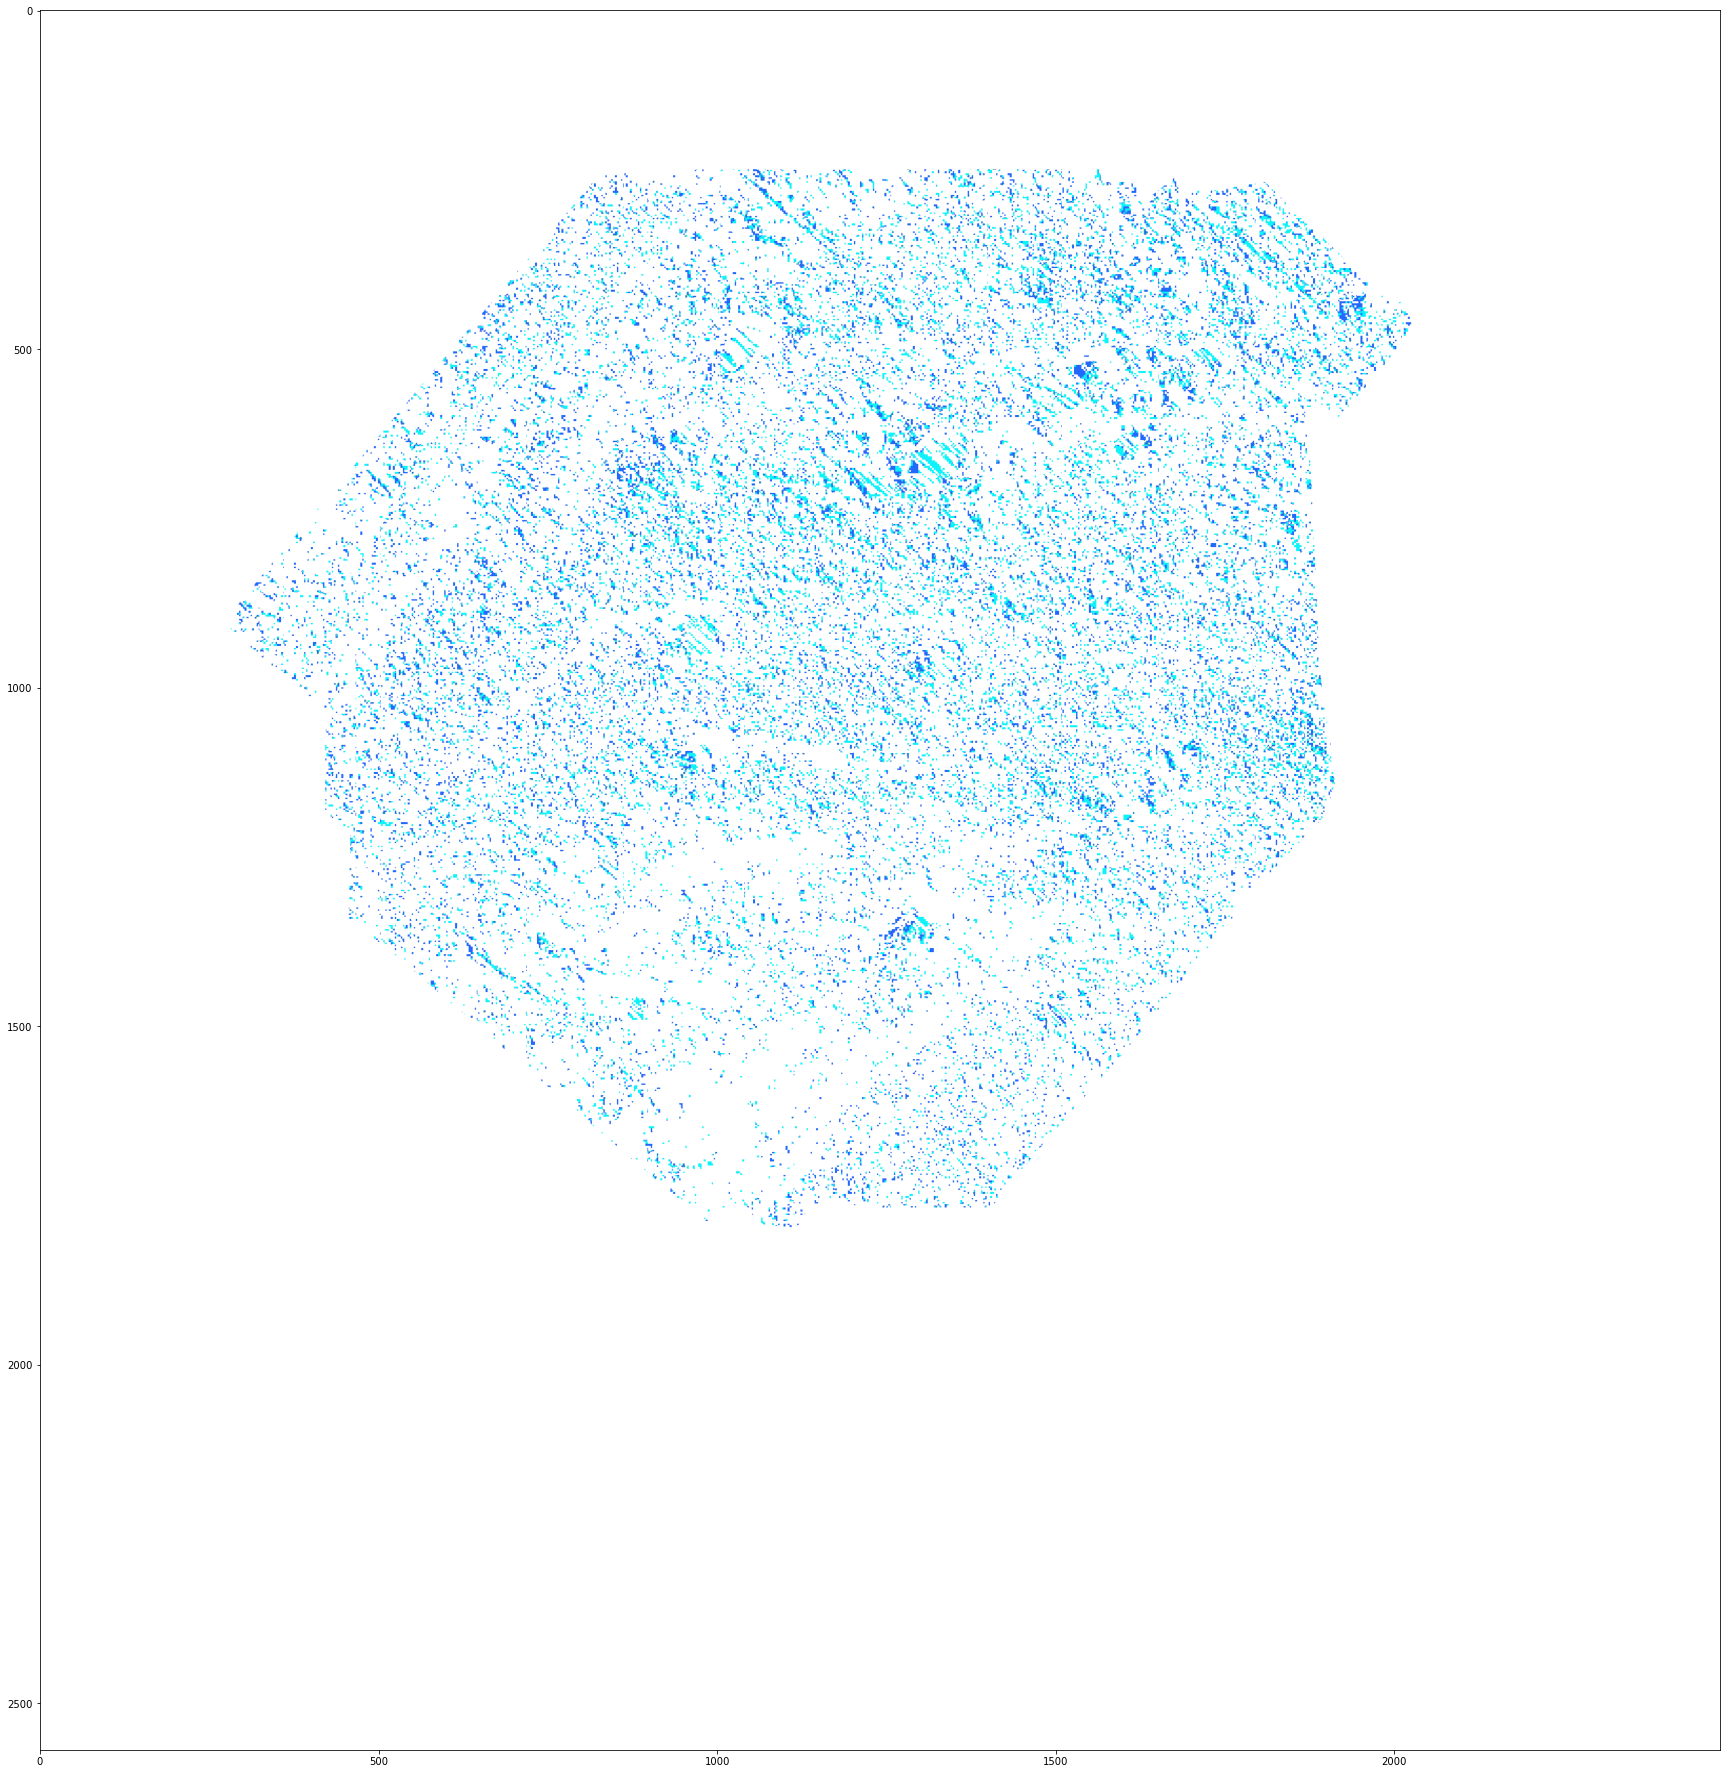

In [33]:
# turn other pixel to white to visualize specific cluster
masked_image = np.copy(img)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# select cluster and disable others
label = label.flatten()
cluster = 3
masked_image[label != cluster] = [255, 255, 255]
# convert back to original shape
masked_image = masked_image.reshape(img.shape)
# show the image
figure_size = 32
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(masked_image)
plt.show()